## Importing Required Libraries

In [1]:
#Uncomment to download the library required to test CEC test functions
# !pip install opfunu
# !pip install --upgrade opfunu

In [2]:
#Functions to handle with relative imports
import sys
sys.path.insert(1, '../')

In [3]:
#Imports of class and functions required
from MetaPy.DifferentialEvolution.DifferentialEvolution import DifferentialEvolution

from MetaPy.DifferentialEvolution.DifferentialEvolution_Clustering import DifferentialEvolution_Clustering
from sklearn import cluster

import math

from PlottingFunctions import PlottingSnapshots
from AuxiliarFunctions import objectiveFunctionCEC , individual

## Differential Evolution

In [4]:
#Init Diff Evol Clustering
functionNumber = '9'
dimension = 2  #Dimensions = 2, 10, 20, 30, 50 or 100. Some functions doesn't work with all dimensions
objectiveFunction = objectiveFunctionCEC(functionNumber,dimension=dimension)

lower , upper = -100 , 100
initializeIndividual = individual(lower,upper,dimension)

DiffEvol = DifferentialEvolution(objectiveFunction,initializeIndividual)

In [5]:
#Calling Diff Evol to find optimal
iterations = 50
populationSize = 200
scalingFactor = 0.5
crossoverRate = 0.5

optimalFound , snapshots = DiffEvol(iterations,populationSize,scalingFactor,crossoverRate)

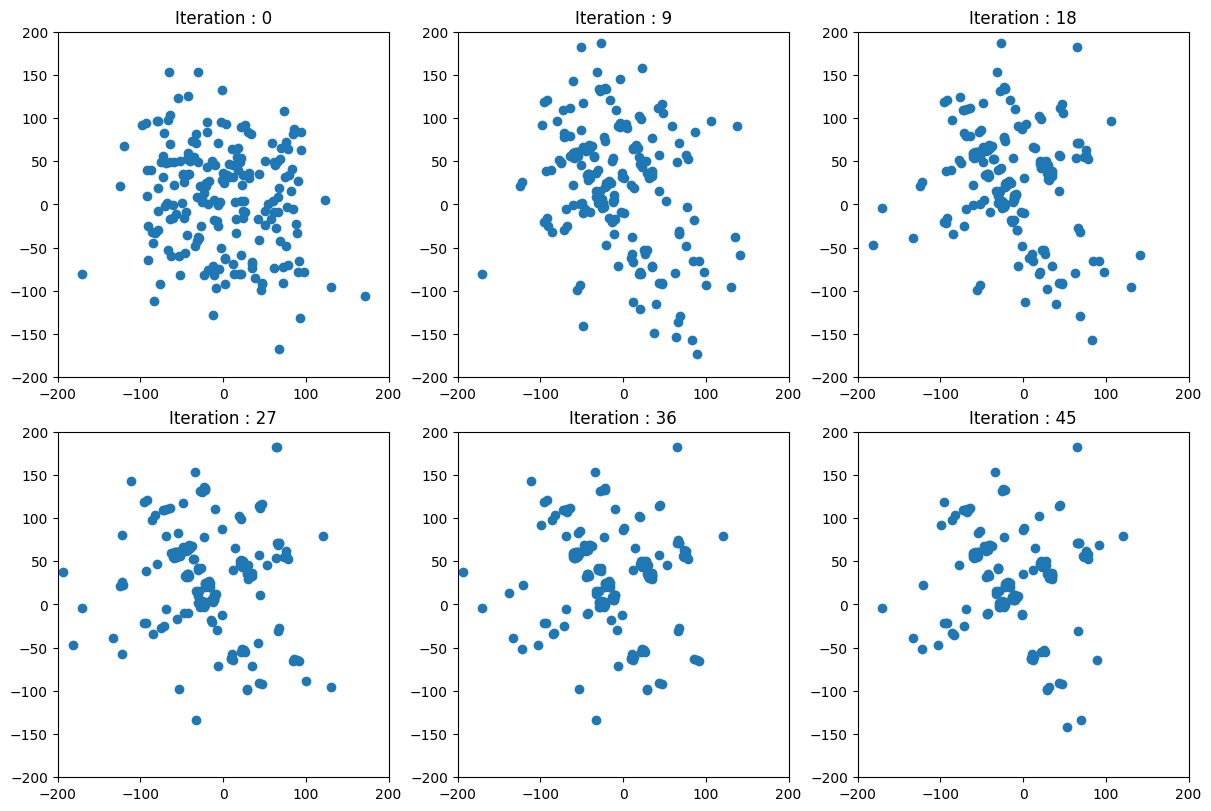

In [6]:
SubPlot_kw = {'autoscale_on':False,'xbound':(-200,200),'ybound':(-200,200)}

PlottingSnapshots(snapshots,9,SubPlot_kw)

## Differential Evolution -- DBSCAN

In [7]:
#Init Diff Evol Clustering
functionNumber = '9'
dimension = 2  #Dimensions = 2, 10, 20, 30, 50 or 100. Some functions doesn't work with all dimensions
objectiveFunction = objectiveFunctionCEC(functionNumber,dimension=dimension)

lower , upper = -100 , 100
initializeIndividual = individual(lower,upper,dimension)

clusteringAlgorithm = cluster.dbscan

DiffEvol_DBSCAN = DifferentialEvolution_Clustering(objectiveFunction,initializeIndividual,clusteringAlgorithm)

In [8]:
#Calling Diff Evol to find optimal
iterations = 100
populationSize = 200
scalingFactor = 0.5
crossoverRate = 0.5

clusteringAlgorithm_kw = {'eps':10,'min_samples':2}

optimalFound_DBSCAN , snapshots_DBSCAN = DiffEvol_DBSCAN(iterations,populationSize,scalingFactor,crossoverRate,clusteringAlgorithm_kw)
optimalFound_DBSCAN , objectiveFunction(optimalFound_DBSCAN)

(array([-24.88494326,   0.84587993]), np.float64(900.1089029892298))

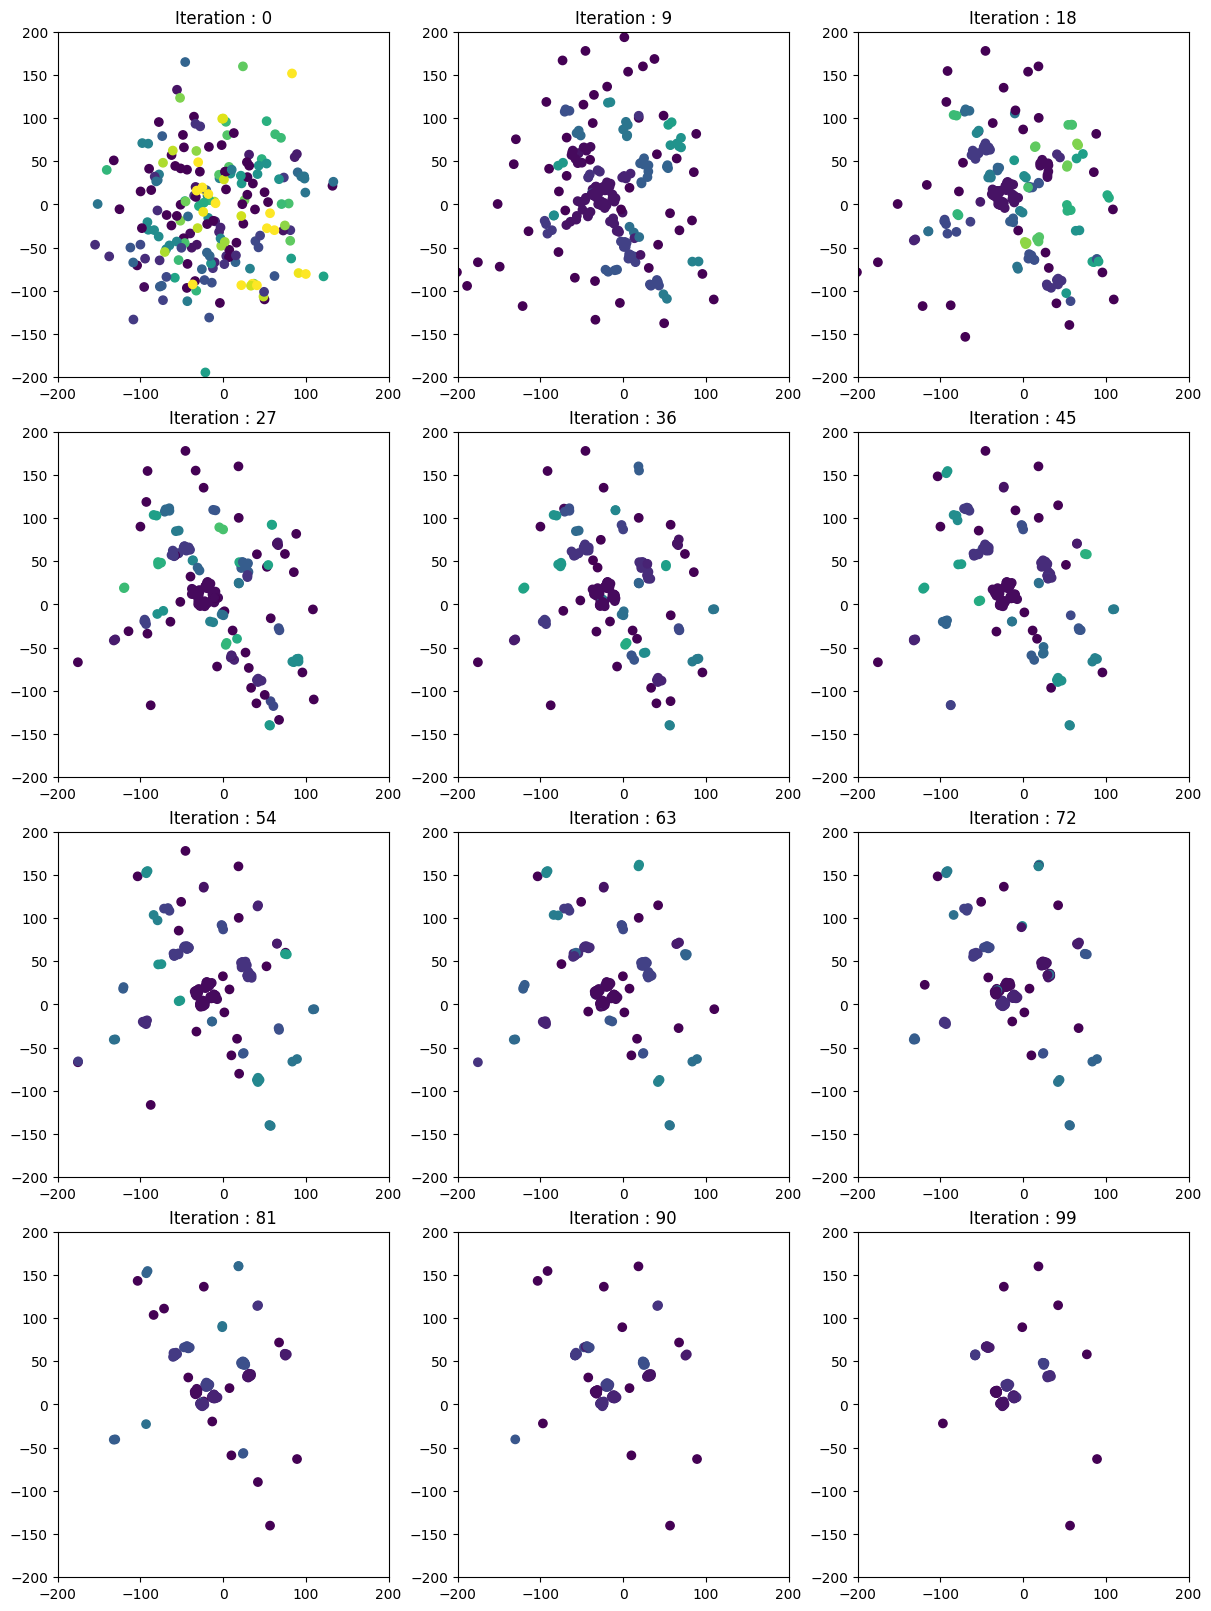

In [9]:
SubPlot_kw = {'autoscale_on':False,'xbound':(-200,200),'ybound':(-200,200)}
Scatter_kw = {'vmin':-1,'vmax':40,'cmap':'viridis'}

PlottingSnapshots(snapshots_DBSCAN,9,SubPlot_kw,Scatter_kw=Scatter_kw)

## Differential Evolution -- Agglomerative Clustering

In [10]:
#Init Diff Evol Clustering
functionNumber = '9'
dimension = 2  #Dimensions = 2, 10, 20, 30, 50 or 100. Some functions doesn't work with all dimensions
objectiveFunction = objectiveFunctionCEC(functionNumber,dimension=dimension)

lower , upper = -100 , 100
initializeIndividual = individual(lower,upper,dimension)

agglomerativeClustering = cluster.AgglomerativeClustering(n_clusters=None,distance_threshold=100)
clusteringAlgorithm = lambda population: agglomerativeClustering.fit_predict(population)

DiffEvol_Agglomerative = DifferentialEvolution_Clustering(objectiveFunction,initializeIndividual,clusteringAlgorithm)

In [11]:
#Calling Diff Evol to find optimal
iterations = 100
populationSize = 200
scalingFactor = 0.5
crossoverRate = 0.5

clusteringAlgorithm_kw = {}

optimalFound_Agglomerative , snapshots_Agglomerative = DiffEvol_Agglomerative(iterations,populationSize,scalingFactor,crossoverRate,clusteringAlgorithm_kw)
optimalFound_Agglomerative , objectiveFunction(optimalFound_Agglomerative)

(array([-24.87200049,   0.81539325]), np.float64(900.1813290189234))

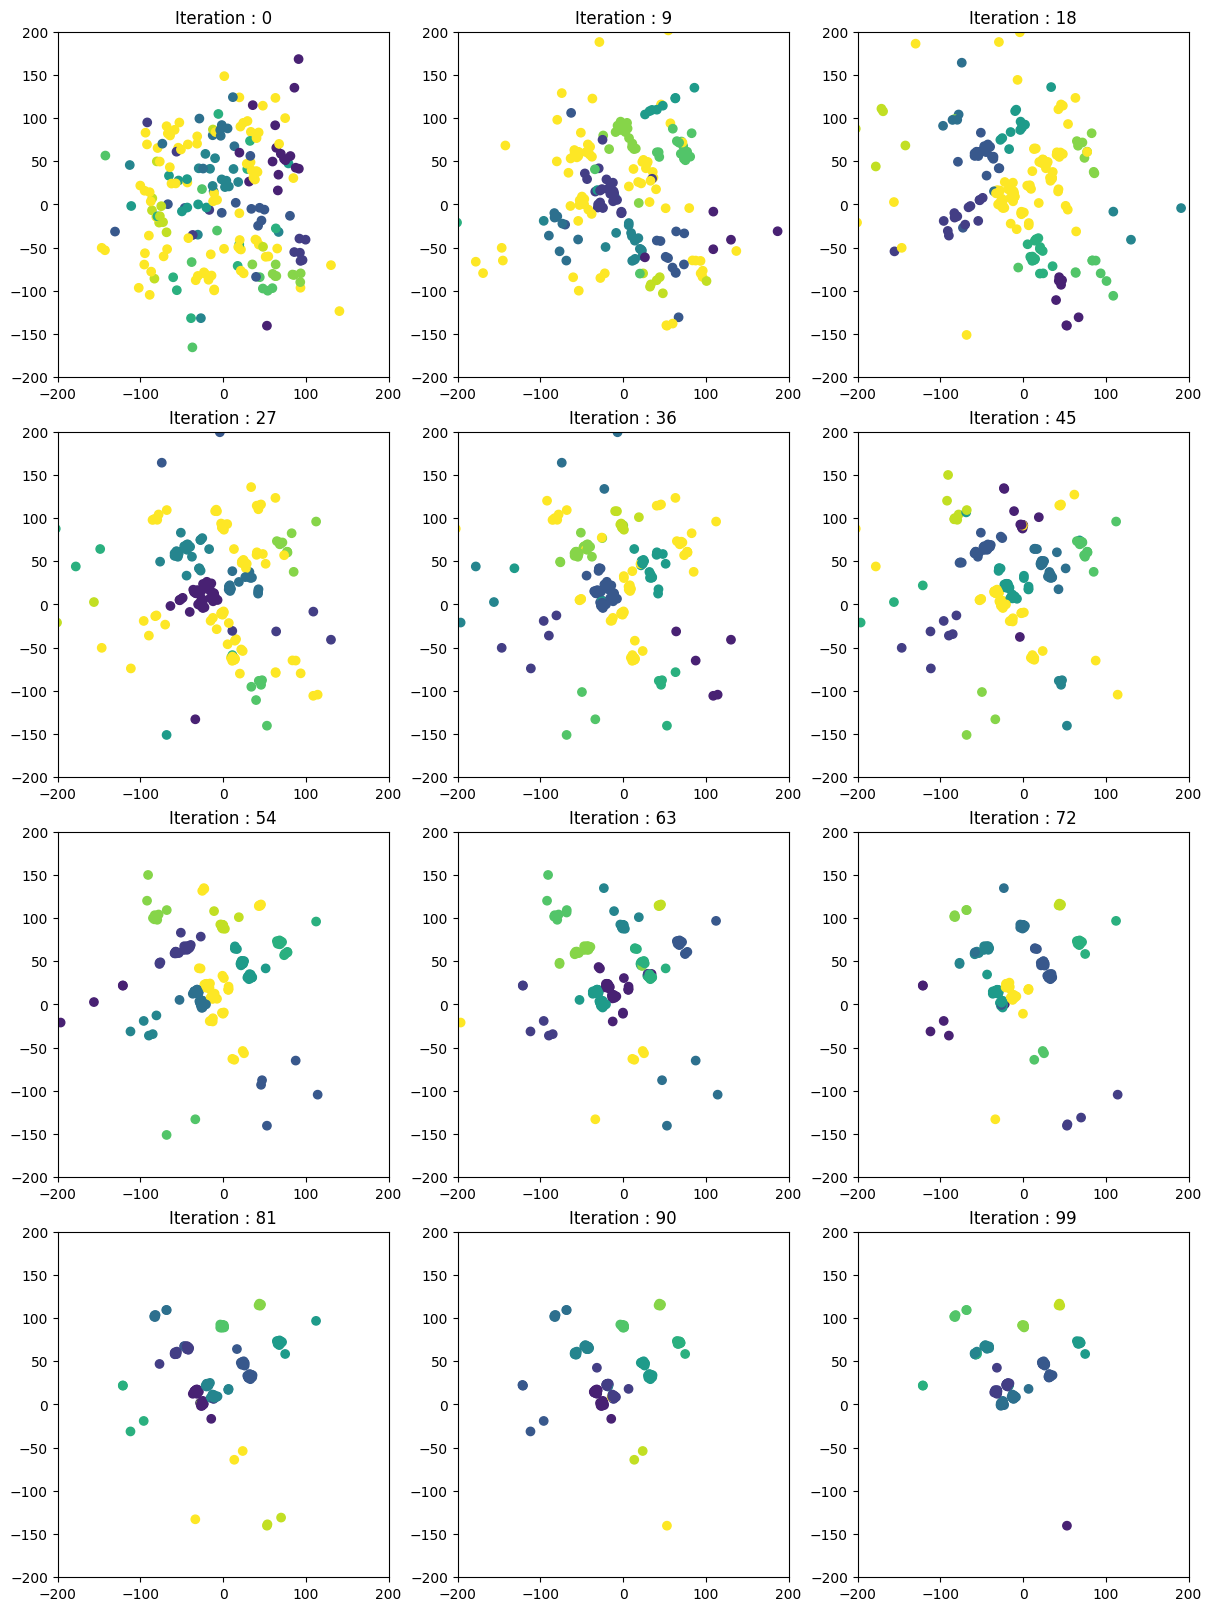

In [12]:
SubPlot_kw = {'autoscale_on':False,'xbound':(-200,200),'ybound':(-200,200)}
Scatter_kw = {'vmin':-1,'vmax':10,'cmap':'viridis'}

PlottingSnapshots(snapshots_Agglomerative,9,SubPlot_kw,Scatter_kw=Scatter_kw)

## Differential Evolution -- Kmeans

In [13]:
#Init Diff Evol Clustering
functionNumber = '9'
dimension = 2  #Dimensions = 2, 10, 20, 30, 50 or 100. Some functions doesn't work with all dimensions
objectiveFunction = objectiveFunctionCEC(functionNumber,dimension=dimension)

lower , upper = -100 , 100
initializeIndividual = individual(lower,upper,dimension)

clusteringAlgorithm = cluster.k_means

DiffEvol_kmeans = DifferentialEvolution_Clustering(objectiveFunction,initializeIndividual,clusteringAlgorithm)

In [14]:
#Calling Diff Evol to find optimal
iterations = 100
populationSize = 200
scalingFactor = 0.5
crossoverRate = 0.5

clusteringAlgorithm_kw = {'n_clusters':math.ceil(math.sqrt(populationSize))}

optimalFound_kmeans , snapshots_kmeans = DiffEvol_kmeans(iterations,populationSize,scalingFactor,crossoverRate,clusteringAlgorithm_kw)
optimalFound_kmeans , objectiveFunction(optimalFound_kmeans)

(array([-11.07396092,   8.71145367]), np.float64(900.3236354289119))

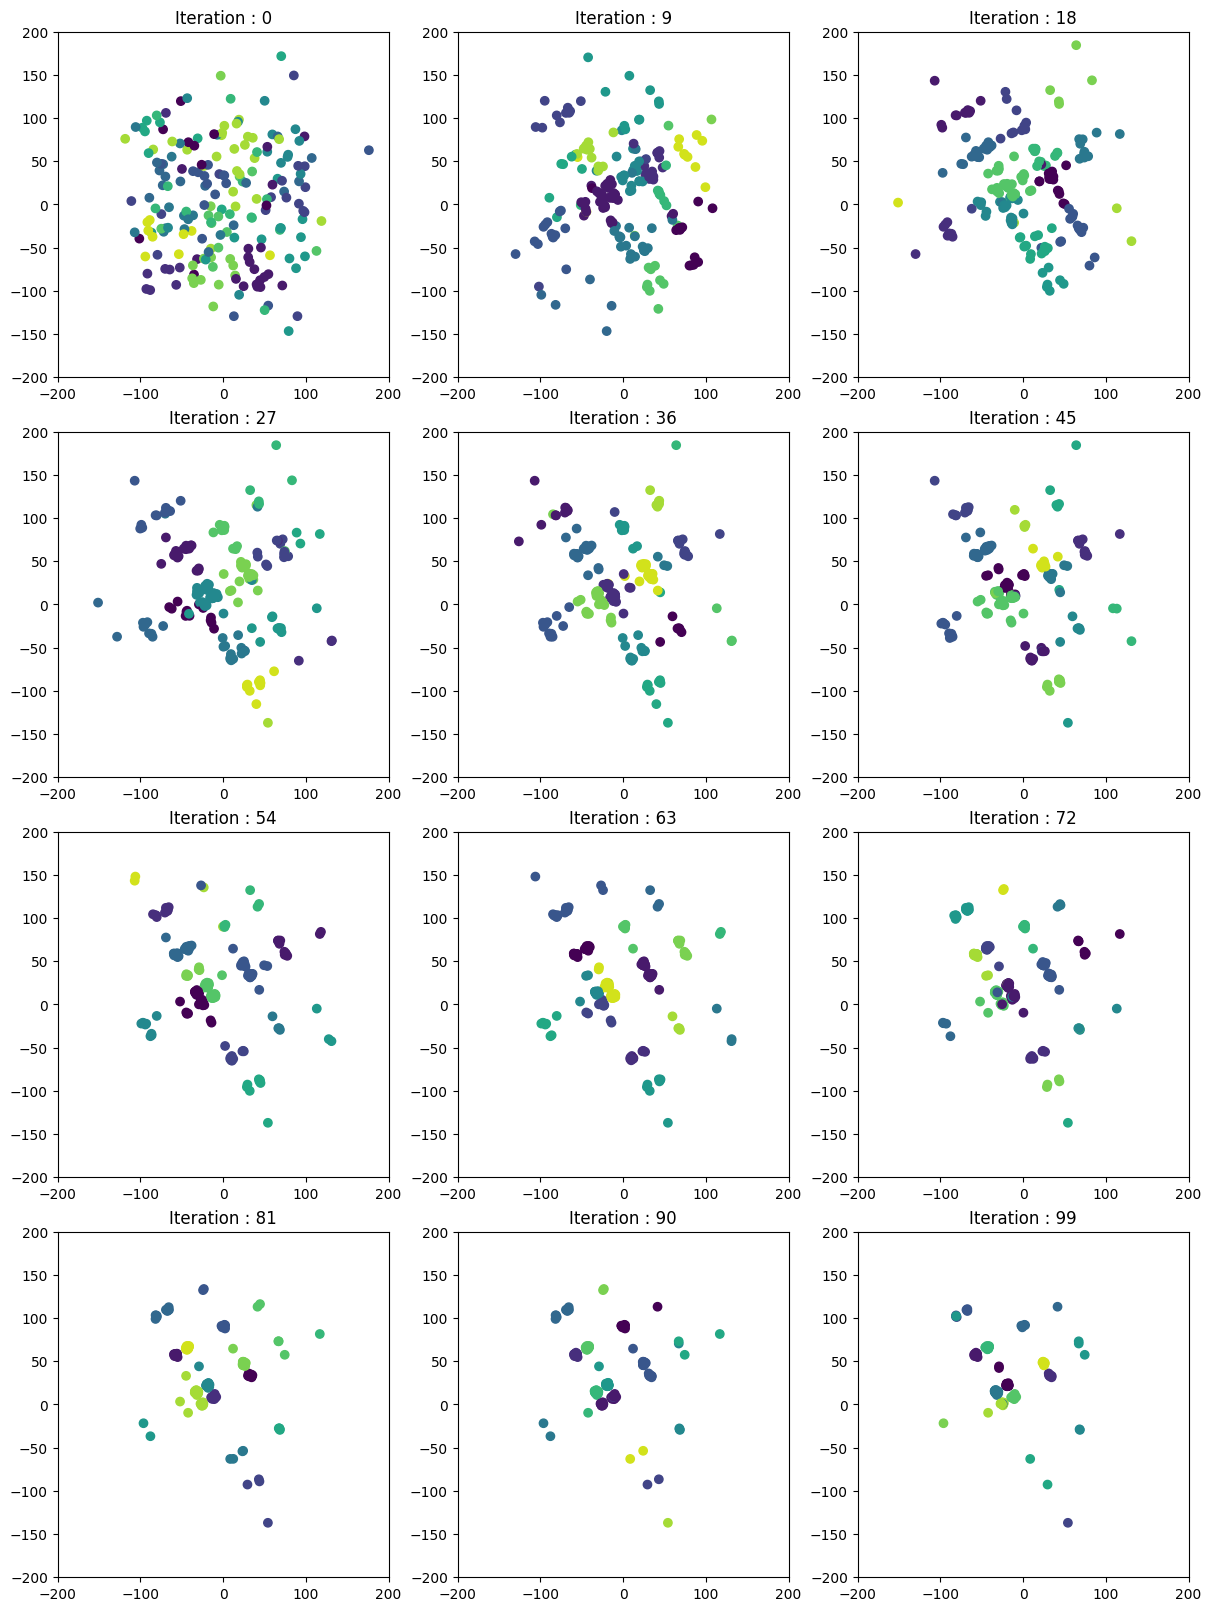

In [15]:
SubPlot_kw = {'autoscale_on':False,'xbound':(-200,200),'ybound':(-200,200)}
Scatter_kw = {'vmin':0,'vmax':clusteringAlgorithm_kw['n_clusters'],'cmap':'viridis'}

PlottingSnapshots(snapshots_kmeans,9,SubPlot_kw,Scatter_kw=Scatter_kw)